In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

main_df = pd.read_csv("n107 - Sheet1.csv")

In [92]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [93]:
num_of_peaks = 50
main_df.head()

,Signal1,Signal2,ID
0,26.0,27.0,0
1,58.0,62.0,1
2,25.0,34.0,2
3,29.0,27.0,3
4,47.0,64.0,4


In [94]:
len(main_df)

36843

In [95]:
len(main_df)

36843

In [96]:
avg = main_df["Signal1"].mean()
print("Average1 :",avg)
avg2 = main_df["Signal2"].mean()
print("Average2:",avg2)

Average1 : 113.54771727919223
Average2: 169.13004532993133


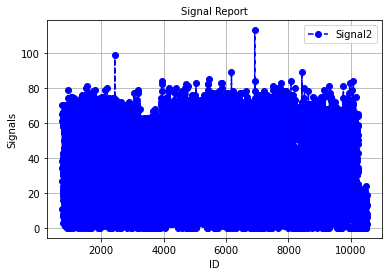

In [97]:
import csv
  
x = []
y1 = []
y2 = []
  
for i in range(754,10508):
    x.append(main_df["ID"][i])
    y1.append(main_df["Signal1"][i])
    y2.append(main_df["Signal2"][i])

  
  
plt.plot(x, y2, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Signal2")
  
plt.xlabel('ID')
plt.ylabel('Signals')
plt.title('Signal Report', fontsize = 10)
plt.grid()
plt.legend()
plt.show()


In [98]:
for i in range(len(main_df)):
    if(main_df.at[i,'Signal1']<avg and main_df.at[i,'Signal2']<avg2):
        main_df = main_df.drop(index = i)
        #print(i)

In [99]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [100]:
main_df.set_index("ID", inplace = True)
main_df.head()


,Signal1,Signal2
ID,,
0,124.0,246.0
1,558.0,91.0
2,338.0,288.0
3,102.0,377.0
4,114.0,37.0


In [101]:
len(main_df)

8950

Saving the raw data in a file

main_df.to_csv("f051ff_raw.csv")

In [102]:
limit = int(len(main_df)/num_of_peaks)
rms_id = []
rms_values = []
mean_values = []
kurtosis_values = []
sd_values = []
skew_values = []
rms_values2 = []
mean_values2 = []
kurtosis_values2 = []
sd_values2 = []
skew_values2 = []

In [103]:
for i in range(num_of_peaks):
    rms_id.append(i)  

In [104]:
from scipy import stats
from scipy.stats import kurtosis
for i in range(num_of_peaks):
    val = 0
    mean = 0
    val2 = 0
    mean2 = 0
    part_data_s1 = []
    part_data_s2 = []
    for j in range(limit):
        val = val + (main_df.at[i+j, 'Signal1'])*(main_df.at[i+j, 'Signal1'])
        mean = mean + (main_df.at[i+j, 'Signal1']) 
        val2 = val2 + (main_df.at[i+j, 'Signal2'])*(main_df.at[i+j, 'Signal2'])
        mean2 = mean2 + (main_df.at[i+j, 'Signal2']) 
        part_data_s1.append(main_df.at[i+j, 'Signal1'])
        part_data_s2.append(main_df.at[i+j, 'Signal2'])
    val = val/limit
    mean = mean/limit
    val2 = val2/limit
    mean2 = mean2/limit
    val = math.sqrt(val)
    val2 = math.sqrt(val)
    rms_values.append(val) 
    rms_values2.append(val2)
    mean_values.append(mean)
    mean_values2.append(mean2)
    kurtosis_values.append(kurtosis(part_data_s1)) 
    kurtosis_values2.append(kurtosis(part_data_s2))
    sd_values.append(stats.tstd(part_data_s1))
    sd_values2.append(stats.tstd(part_data_s2))
    skew_values.append(stats.skew(part_data_s1))
    skew_values2.append(stats.skew(part_data_s2))

In [105]:
print(rms_id) 
print(len(rms_id)) 
print(rms_values) 
print(len(rms_values))  
print(rms_values2) 
print(len(rms_values2)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[254.3567634809258, 254.76851142440626, 252.77575240830873, 251.69775481028097, 252.70958446052714, 254.01903548958975, 252.81620501770269, 252.73204393887127, 252.16481707817022, 252.34606458759993, 252.27641796539865, 252.6349078176741, 253.42431351700304, 252.04670578970348, 252.0512273904856, 253.96842499384593, 252.51137481984415, 252.51137481984415, 254.69347334222857, 253.43284456421708, 253.33671589430486, 253.66904273131843, 254.34258557699067, 254.2903039032709, 254.87401861140827, 255.83346101817156, 254.59998200704734, 255.9359862353853, 257.2829453471031, 256.014075206639, 255.9744007801339, 255.83948791267346, 256.10278575507215, 256.0369866786555, 255.71682575080396, 256.00225863179605, 255.9474893770903, 256.21834046146427, 256.8765762365156, 255.38358705350046, 255.9736369107101

In [106]:
print(rms_values2) 
print(len(rms_values2))  

[15.948566188874967, 15.961469588493607, 15.898922995231745, 15.864985181533608, 15.89684196501076, 15.93797463574308, 15.900195125145562, 15.897548362526571, 15.879698267856673, 15.885404136741373, 15.883211827756963, 15.894493002850833, 15.919306313938527, 15.875978892329867, 15.876121295533288, 15.936386823676374, 15.890606496287175, 15.890606496287175, 15.959118814716199, 15.919574258258827, 15.916554774645952, 15.926991013098439, 15.948121694324717, 15.946482493116497, 15.964774305057002, 15.994794810130312, 15.956189457606955, 15.997999444786378, 16.040041937199014, 16.000439844161754, 15.999200004379404, 15.994983210765602, 16.003211732495203, 16.001155791962514, 15.991148356225201, 16.000070582087943, 15.998358958877324, 16.00682168518986, 16.02736959817535, 15.980725485831377, 15.999176132248504, 16.025914083212548, 16.04794252932769, 16.06120139627605, 16.034168282951455, 15.993590185664344, 16.034509108230772, 16.069375112876152, 16.03315008197287, 16.03264582278066]
50


In [107]:
data = {'ID': rms_id,
        'rms':rms_values,
        'mean': mean_values,
        'kurtosis':kurtosis_values,
        'SD': sd_values,
        'skewness':skew_values,
        'rms2':rms_values2,
        'mean2': mean_values2,
        'kurtosis2':kurtosis_values2,
        'SD2': sd_values2,   
        'skewness2':skew_values2
       }
df = pd.DataFrame(data)

In [108]:
df.to_csv("s208_50.csv")